# Lecture 7 : Data Visualization (ploting using matplotlib)

## A. Introduction to Matplotlib

- Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python

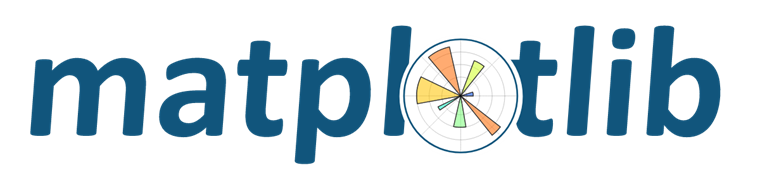

- Most of the Matplotlib utilities lies under the pyplot submodule, and are usually imported under the plt alias

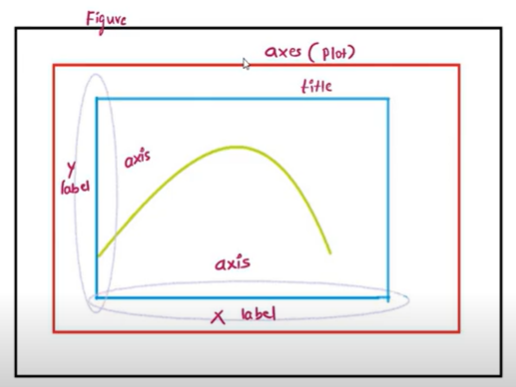

## B. Loading libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_excel("yelp.xlsx")
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


name   category_0       category_1  take_out  \
0  China Sea Chinese Restaurant  Restaurants          Chinese      True   
1          Discount Tire Center        Tires       Automotive     False   
2                  Frankfurters  Restaurants         Hot Dogs      True   
3             Fred Dietz Floral     Shopping  Flowers & Gifts     False   
4                 Kuhn's Market         Food          Grocery     False   

   review_count  stars  city_id  state_id  
0          11.0    2.5        1         1  
1          24.0    4.5        1         1  
2           3.0    4.5        1         1  
3           6.0    4.0        1         1  
4           8.0    3.5        1         1

## C. Ploting Graph

### 1. Bar Graph
With `Pyplot`, you can use the `bar()` function to draw bar graphs

`matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)`

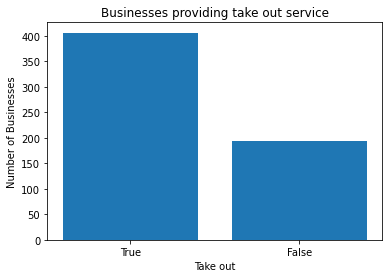

In [3]:
#setting primary variable
x = ['True','False']
#setting secondary variable
y = df.take_out.value_counts()
#ploting graph using x and y values
plt.bar(x,y)
#setting title of the graph
plt.title("Businesses providing take out service")

#setting x and y label for the graph
plt.xlabel("Take out")
plt.ylabel("Number of Businesses")
plt.show()

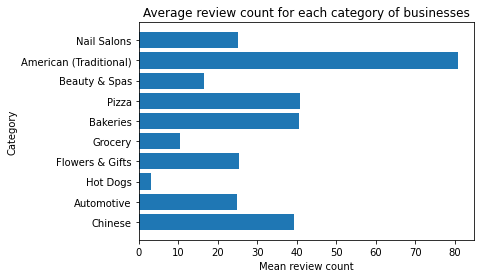

In [4]:
cdf = df.groupby("category_1",sort=False)
#setting y value from statistics summary
yfirst10 = cdf['review_count'].mean()[:10]
#x value as categorical
xfirst10 = df.category_1.unique()[:10]
plt.barh(xfirst10,yfirst10)
plt.title("Average review count for each category of businesses")
plt.xlabel("Mean review count")
plt.ylabel("Category")
plt.show()

### 2. Histogram

The ``hist()`` function will use an array of numbers to create a histogram, the array is sent into the function as an argument.

`matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)[source]`

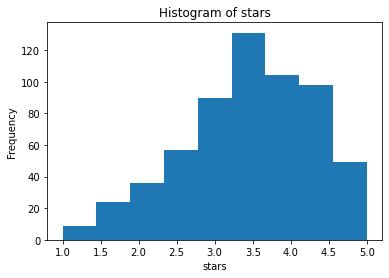

In [5]:
x = df.stars
plt.hist(x,bins=9)
plt.title('Histogram of stars')
plt.xlabel('stars')
plt.ylabel('Frequency')
plt.show()

### 3. Pie Chart

With Pyplot, you can use the `pie()` function to draw pie charts

`matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, data=None)`

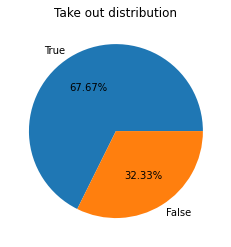

In [6]:
x = df.take_out.value_counts()
label = df.take_out.unique()
plt.title('Take out distribution')
plt.pie(x,labels = label,autopct="%0.2f%%")
plt.show()

### 4. Scatter Plot
- With Pyplot, you can use the `scatter()` function to draw a scatter plot.


- The `scatter()` function plots one dot for each observation. It needs two arrays of the same length, one for the values of the `x-axis`, and one for values on the `y-axis`:

`matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)`

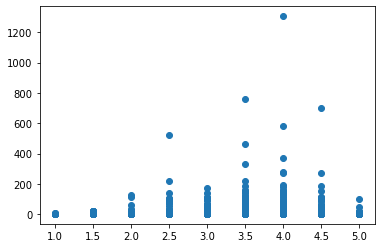

In [7]:
plt.scatter(df.stars,df.review_count)
plt.show()

In [8]:
bdf = pd.read_csv("goodreads.csv",names=['rating','review_count','ISBN','booktype','author_url','year','genre_urls','dir','rating_count','name'])
bdf.head()
bdf.dropna(inplace=True)
bdf['review_count'] = bdf['review_count'].astype('int')
bdf['rating_count'] = bdf['rating_count'].astype('int')
bdf['year'] = bdf['year'].astype('int')

In [12]:
yeardf = bdf.groupby("year")
df2010 = yeardf.get_group(2010)

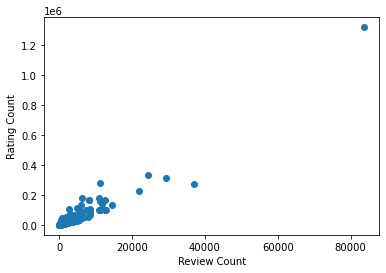

In [14]:
x = df2010.review_count
y = df2010.rating_count
plt.scatter(x,y)
plt.xlabel('Review Count')
plt.ylabel('Rating Count')
plt.show()

### 5. Line Graph
- The `plot()` function is used to draw points (markers) in a diagram.

- By default, the `plot()` function draws a line from point to point.
- The function takes parameters for specifying points in the diagram. Parameter 1 is an array containing the points on the `x-axis`. Parameter 2 is an array containing the points on the `y-axis`.

`matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)`

In [28]:
year10 = yeardf[['review_count','rating_count']].mean()[-10:]

<function matplotlib.pyplot.show(close=None, block=None)>

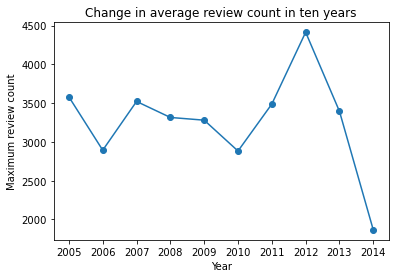

In [30]:
plt.plot(year10.index,year10.review_count,marker='o')
plt.xticks(year10.index)
plt.title('Change in average review count in ten years')
plt.xlabel("Year")
plt.ylabel("Maximum review count")
plt.show

### 6. Box Plot

`matplotlib.pyplot.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)[source]`

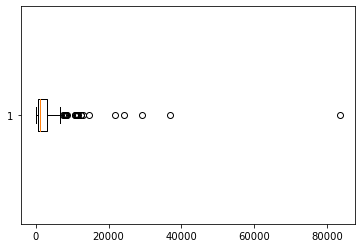

In [31]:
plt.boxplot(df2010.review_count,vert=False)
plt.show()

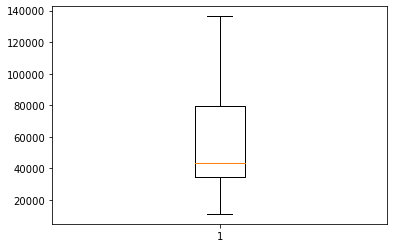

In [34]:
year20 = yeardf[['review_count','rating_count']].max()[-20:]
plt.boxplot(year20.review_count)
plt.show()

#                             THANK YOU